In [1]:
import os
from PIL import Image
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch
import torchvision.transforms as transforms
import numpy as np

path = "/Users/liushiwen/Desktop/大四下/hw2/test_data"
path = "D:\Casper\OTHER\Data\MNIST2\HW2_MNIST_train"
dir_list = os.listdir(path)

print(f"Files and directories in '{path}':")
for item in dir_list:
    print(item)


Files and directories in 'D:\Casper\OTHER\Data\MNIST2\HW2_MNIST_train':
0000000.png
0000000.txt
0000001.png
0000001.txt
0000002.png
0000002.txt
0000003.png
0000003.txt
0000005.png
0000005.txt
0000006.png
0000006.txt
0000007.png
0000007.txt
0000008.png
0000008.txt
0000009.png
0000009.txt
0000011.png
0000011.txt
0000012.png
0000012.txt
0000013.png
0000013.txt
0000014.png
0000014.txt
0000015.png
0000015.txt
0000016.png
0000016.txt
0000017.png
0000017.txt
0000019.png
0000019.txt
0000020.png
0000020.txt
0000022.png
0000022.txt
0000023.png
0000023.txt
0000024.png
0000024.txt
0000025.png
0000025.txt
0000026.png
0000026.txt
0000028.png
0000028.txt
0000029.png
0000029.txt
0000030.png
0000030.txt
0000031.png
0000031.txt
0000032.png
0000032.txt
0000033.png
0000033.txt
0000034.png
0000034.txt
0000035.png
0000035.txt
0000036.png
0000036.txt
0000037.png
0000037.txt
0000039.png
0000039.txt
0000043.png
0000043.txt
0000044.png
0000044.txt
0000045.png
0000045.txt
0000046.png
0000046.txt
0000047.png
0000

0	0.7734375	0.4296875	0.21875	0.21875

(128, 128, 4)


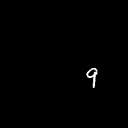

In [9]:
f = open(f"{path}/0000002.txt", "r")
print(f.read())
img = Image.open(f'{path}/0121744.png')
img = np.array(img)
print(img.shape)
img = Image.fromarray(img[:,:,2])
display(img)

In [10]:
import os
import pandas as pd
from torch.utils.data import Dataset
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, data_folder, transform=None):
        self.data_folder = data_folder
        self.image_files = [f for f in os.listdir(data_folder) if f.endswith(".png")]
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.data_folder, self.image_files[idx])
        image = read_image(image_path)
        image = image[0:3].float()
        # print(image.shape)
        # image = image.reshape(1, 128, 128)
        
        txt_file = os.path.splitext(self.image_files[idx])[0] + ".txt"
        txt_path = os.path.join(self.data_folder, txt_file)
        with open(txt_path, "r") as f:
            first_line = f.readline().strip()
            class_label = int(first_line.split()[0])

        if self.transform:
            image = self.transform(image)

        return image, class_label

transform = transforms.Compose([transforms.Resize((128, 128)),
                                ])
data_folder = path
custom_dataset = CustomImageDataset(data_folder, transform)


In [11]:
print(custom_dataset[0][0])

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


In [12]:
train_loader = DataLoader(custom_dataset, batch_size=128, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
print(len(train_loader))

761


In [13]:
def count_parameters(model):
    total_num = 0

    for parameter in model.parameters():
        if parameter.requires_grad:
            total_num += parameter.numel() 
    return total_num


In [17]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 64 * 64, 128)
        self.fc2 = nn.Linear(128, 10)  # 10 output classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 16 * 64 * 64)  # Flatten the feature maps
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = SimpleCNN()

import torchvision.models as models
from torch import nn, optim

# Assuming the use of CUDA if available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the ResNet18 model
model = models.resnet18(pretrained=True)  # Set to False if you don't want to use the pre-trained weights

# Modify the final layer to match the number of classes in your dataset
num_ftrs = model.fc.in_features
num_classes = 10  # Update this to match your dataset
model.fc = nn.Linear(num_ftrs, num_classes)
model_parameters_amount = count_parameters(model)
print(f"model total parameters: {model_parameters_amount:,}")

model = model.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 1
for epoch in range(epochs):
    running_loss = 0.0
    correct_predictions = 0
    correct_top3_predictions = 0
    total_samples = 0
        
    for images, labels in train_loader:
        images = images.cuda()
        labels = labels.cuda()

        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Convert outputs to predicted class by selecting the class with the highest score
        _, predicted = torch.max(outputs, 1)
        # Accumulate the number of correct predictions
        correct_predictions += (predicted == labels).sum().item()
        
        _, top3_preds = outputs.topk(3, 1, True, True)
        correct_top3_predictions += sum([labels[i] in top3_preds[i] for i in range(labels.size(0))])

        total_samples += labels.size(0)

    avg_loss = running_loss / len(train_loader)
    top1_accuracy = correct_predictions / total_samples * 100
    top3_accuracy = correct_top3_predictions / total_samples * 100

    print(f"Epoch [{epoch+1}/10], Loss: {avg_loss:.4f}, Top-1 Accuracy: {top1_accuracy:.2f}%, Top-3 Accuracy: {top3_accuracy:.2f}%")

c:\Users\User\anaconda3\envs\GPU\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\User\anaconda3\envs\GPU\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


model total parameters: 11,181,642
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


KeyboardInterrupt: 

In [19]:
data_folder = "D:\Casper\OTHER\Data\MNIST2\HW2_MNIST_test"

test_dataset = CustomImageDataset(data_folder, transform)

test_loader = DataLoader(custom_dataset, batch_size=128)
# test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
print(len(test_loader))


761


In [21]:
# import torch
# import csv

# # Assuming model is your trained model and test_loader is your DataLoader for the test dataset
# model.eval()  # Set the model to evaluation mode

# # Path to save the CSV file
# output_csv_path = 'test_predictions.csv'

# with torch.no_grad():  # No need to track gradients for validation
#     with open(output_csv_path, mode='w', newline='') as file:
#         writer = csv.writer(file)
#         writer.writerow(['filename', 'class'])  # Write the header row

#         for images, labels, filenames in test_loader:  # Assuming filenames are provided
#             images = images.cuda()
#             outputs = model(images)

#             _, predicted = torch.max(outputs, 1)
#             predicted_classes = [test_loader.dataset.classes[pred] for pred in predicted]  # Convert to class names if applicable

#             for filename, pred_class in zip(filenames, predicted_classes):
#                 writer.writerow([filename, pred_class])

# print(f"Results saved to {output_csv_path}")


AttributeError: 'CustomImageDataset' object has no attribute 'classes'

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

# Define the CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 64 * 64, 128)
        self.fc2 = nn.Linear(128, 10)  # 10 output classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 16 * 64 * 64)  # Flatten the feature maps
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load CIFAR-10 dataset (you can replace this with your own dataset)
transform = transforms.Compose([transforms.Resize((128, 128)),
                                transforms.ToTensor()])
train_dataset = CIFAR10(root="D:\Casper\OTHER\Data\cifar", train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Initialize the model
model = SimpleCNN()
model = model.cuda()
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop (you can adjust the number of epochs)
for epoch in range(10):
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
        
    for images, labels in train_loader:
        images = images.cuda()
        labels = labels.cuda()

        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Convert outputs to predicted class by selecting the class with the highest score
        _, predicted = torch.max(outputs, 1)
        # Accumulate the number of correct predictions
        correct_predictions += (predicted == labels).sum().item()
        # Accumulate the total number of samples seen
        total_samples += labels.size(0)

        # Optional: break here if you want to test with just the first batch
        # break

    # Calculate average loss and accuracy over the epoch
    avg_loss = running_loss / len(train_loader)
    accuracy = correct_predictions / total_samples * 100
        # break
    print(f"Epoch [{epoch+1}/10], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")


Files already downloaded and verified
Epoch [1/10], Loss: 1.7137, Accuracy: 37.24%
Epoch [2/10], Loss: 1.5531, Accuracy: 43.10%
Epoch [3/10], Loss: 1.5096, Accuracy: 44.43%
Epoch [4/10], Loss: 1.4768, Accuracy: 45.74%


KeyboardInterrupt: 

In [ ]:

# Save the trained model
torch.save(model.state_dict(), "simple_cnn_model.pth")
